## APS 2 - Aplicação do Método de Diferenças Finitas

- Lorran Lopes
- Letícia Coelho
- Lídia Alves

#### Definição do problema

Considere uma aleta de seção transversal circular e constante, com temperatura fixa na base e exposta ao ambiente em todas as outras superfícies. Podemos esboçar as entradas e saídas de energia em um volume de controle definido ao redor
de uma seção como indica a Fig.1. 

<img src = "aleta.png">

Substituindo as equações de taxa qx
, qx+dx e dqconv podemos obter a forma geral da equação da energia para uma
superfície estendida, em regime transiente como:

<img src = "equacao.png">

Onde 𝛼 é a difusividade do material, 𝐴tr é a área da seção transversal a aleta, ℎ é o coeficiente de transferência de calor
por convecção, 𝜅 é a condutividade térmica do material da aleta e 𝑃 é o perímetro da seção da aleta

#### Item 01

Para essa questão, é possível pensar no método das diferenças finitas para uma condução unidimensional, que é o caso da aleta acima. Nesse sentido, é possível pensar em duas aproximações para a segunda e primeira derivada:

<img src = "derivadas.png">

Com essas equações e considerando os da segunda derivada no mesmo tempo, é possível fazer algumas manipulações:

<img src = "manipulacao.png">

#### Item 02

#### Definindo os parâmetros

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from math import *

#%% Entrada de dados
# Comprimento da aleta (em m)
L = 0.3

# Diâmetro e raio da aleta (em m)
D = 0.005
R = D/2

# Perímetro da aleta (em m)
P = pi*D

# Área transversal da aleta (em m^2)
Atr = (pi*D**2)/4

# Área da superfície da aleta (em m^2)
A = Atr + 2*pi*L*R

# Coeficiente de convecção térmica (em W/m^2K)
h = 50

# Coeficiente de condutividade térmica no Alumínio (em W/m.K)
k = 180

# Calor específico (em J/kgK)
c = 896

# Densidade [kg/m3]
d = 2700 

# Difusividade [m²/s]
alpha = k/(d*c)

# Temperatura ambiente (em K)
Tamb = 50 + 273

# Temperatura da base (em K)
Tb = 100 + 273

# Temperatura na extremidade (em K)
TL = 25 + 273

# Discretização da malha em x [m]
dx = 1e-3

# Discretização no tempo [s]
dt = 0.9*(dx**2)/(alpha*(((h*P*dx*dx)/(k*Atr)) + 2))

# Número de passos no tempo []
nt = 180001

#%% Cálculos iniciais
# Tempo total [s]
tt = dt*nt

#numero de nós []
nn = int(L/dx)+1

#%% Tolerancia []
tol = 1e-10

#### Por método númerico:

Meu erro é 9.998950874081243e-11 no tempo 403.1935047216975 s


Text(0.5, 0, 'Posição [cm]')

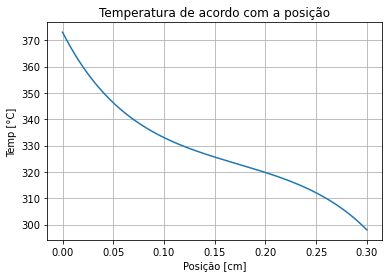

In [8]:
#%% Matriz para armazenar todas as temperaturas [C] 
#matriz para armazenar todas temperaturas [C]
TM = np.zeros((nt,nn))

# Condição inicial
TM[:,:] = 50 + 273
TM[:,nn-1] = 25 + 273
TM[:,0] = 100 + 273

for l in range(0, nt-1):
    for m in range(1, nn-1):
        cte1 = alpha * dt * ((TM[l,m+1] - 2*TM[l,m] + TM[l, m-1])/(dx*dx))
        cte2 = alpha * dt * (((h*P)/(k*Atr))*(TM[l,m] - Tamb))
        TM[l+1, m] = cte1 - cte2 + TM[l, m]
        
    erro = np.amax(abs((TM[l+1,1:nn-1] - TM[l,1:nn-1])/(np.max(TM[l+1,1:nn-1]))))
    
    if (abs(erro) <= tol):
        tempo = l+1
        print(f'Meu erro é {abs(erro)} no tempo {(l+1)*dt} s')
        break

inst = nt
#posições dos nós
x = np.linspace(0.0, L, nn)
T = np.array(TM[tempo, 0:nn])
plt.plot(x,T)
plt.grid(True)
plt.title("Temperatura de acordo com a posição")
plt.ylabel("Temp [°C]")
plt.xlabel("Posição [cm]")

#### Item 3

#### Por método analítico

É possível analisar o comportamento térmico da aleta de forma analítica, para confirmar também o pensamento numérico. A distribuição de temperatura desse modo usa como condição de contorno também a temperatura na extremidade de 25 ºC, ou seja, de 298 K. Desse modo, a distribuição de temperatura funciona da seguinte forma:

<img src = "eq_analitica.png">

Onde:

<img src = "eq_teta.png">

Fazendo as devidas operações matemáticas:

<img src = "equacoes.png">

Com isso, pode-se chegar ao seguinte código:

In [9]:
def calc_m(h, P, k, Atr):
    m = sqrt((h * P)/(k * Atr))
    return m

def dist_temperatura(h, P, k, Atr, L, Tb, Tamb, TL, x):
    m = calc_m(h, P, k, Atr)
    tetab = Tb - Tamb
    tetaL = TL - Tamb
    numerador = (tetaL*np.sinh(m * x) + (tetab)*np.sinh(m * (L - x)))
    denominador =  np.sinh(m * L)
    dist = numerador/denominador
    TL = dist + Tamb
    return TL

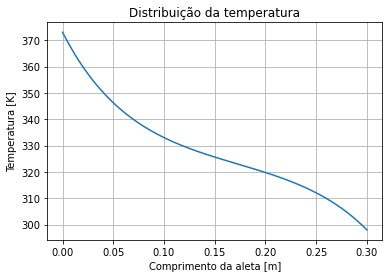

In [10]:
lista_T = []
lista_x = np.arange(0,L,1e-5)

for x in lista_x:
    lista_T.append(dist_temperatura(h, P, k, Atr, L, Tb, Tamb, TL, x))

plt.title("Distribuição da temperatura")
plt.plot(lista_x, lista_T)
plt.grid(True)
plt.xlabel("Comprimento da aleta [m]")
plt.ylabel("Temperatura [K]")
plt.show()

Como é possível observar, o método numérico obteve o mesmo resultado gráfico do modelo analítico, o que era esperado, visto que os dois deveriam chegar ao mesmo resultado expostas ás mesmas condições iniciais e sendo a mesma aleta. 